# The Bald Truth: A Data-Driven Guide and Classifier to Hair Loss

## ✒️ Executive summary

This study analyzed survey data from 999 individuals to investigate the factors influencing hair loss. Variables such as genetics, hormonal changes, medical conditions, lifestyle choices, and environmental factors were examined. The analysis was conducted across three levels: descriptive statistics, visualization, and machine learning.

Key findings revealed that no single factor strongly predicts hair loss, highlighting the need for multi-factorial approaches. Age, genetics, and lifestyle factors (e.g., smoking, poor hair care habits) emerged as the most significant predictors, while medical history and nutritional deficiencies showed limited impact. Among the machine learning models tested, XGBoost achieved the best performance, though classification accuracy ranged between 45% and 65% due to overlapping predictor characteristics.

To improve accuracy, future work should explore advanced modeling techniques like Bayesian hyperparameter optimization and adopt robust validation methods such as nested cross-validation. Enhancing dataset quality by balancing age group representation, incorporating gender as a predictor, and maybe expanding feature sets will also be critical.

This project underscores that while genetics play a role in hair loss, lifestyle improvements and better hair care routines can significantly reduce risk. This conclusion provides a foundation for refining predictive models and advancing our understanding of hair loss prevention.

### 🔑 Keywords:
 - Data analysis and visualization
 - Cramer's V (Measure of association between categorical variables)
 - Feature selection and engineering (PCA and Random Forest variable importance)
 - Classification model training and testing 
   -  Naive Bayes
   -  Logistic Regression
   -  SVM (Radial Basis Function)
   -  Random Forest
   -  XGBoost
   -  Neural Networks (mlp)


## 📖 Background
As we age, hair loss becomes one of the health concerns of many people. The fullness of hair not only affects appearance, but is also closely related to an individual's health.

A survey brings together a variety of factors that may contribute to hair loss, including genetic factors, hormonal changes, medical conditions, medications, nutritional deficiencies, psychological stress, and more. Through data exploration and analysis, the potential correlation between these factors and hair loss can be deeply explored, thereby providing useful reference for the development of individual health management, medical intervention and related industries.

## 🗃️ Packages' library

One of the strengths of R is easiness in working with coding packages developed by other coders. In this work several packages were applied. To name a few: tidyverse (data manipulation, plotting, etc), caret (general machine learning modelling), fastDummies (one-hot encoding preprocessing). All the packages used in this study and in the development , can be seen this work's code.

In [47]:
# Description:
# Add below your list of packages required for this project.

# List of required libraries
required_libraries <- c(
	"tidyverse",
	"readr",
	"gridExtra",
	"fastDummies",
	"FactoMineR",
	"factoextra",
	"caret",
	"naivebayes",
	"xgboost",
	"rcompanion",
	"data.table",
	"kernlab",
	"scorecard",
	"pROC",
	"MLeval",
	"MLmetrics",
	"RSNNS"
) 

# Install missing libraries automatically
install_if_missing <- function(packages) {
missing_packages <- packages[!(packages %in% installed.packages()[, "Package"])]
if (length(missing_packages)) {
  message("Installing missing packages: ", paste(missing_packages, collapse = ", "))
  install.packages(missing_packages)
 }
}

# Call the function to install missing packages
install_if_missing(required_libraries)

# Load the libraries
invisible(lapply(required_libraries, library, character.only = TRUE))

# Error handling for package loading
loaded_libraries <- sapply(required_libraries, require, character.only = TRUE)

if (any(!loaded_libraries)) {
  stop("Error: Some required libraries failed to load: ", 
    paste(names(loaded_libraries[!loaded_libraries]), collapse = ", "))
} else {
  message("All libraries loaded successfully.")
}


# Ensure that the system language is set to English.
# Set all locale settings to English.
Sys.setenv(LANG = "en")
Sys.setlocale("LC_ALL", "en_US.UTF-8")


All libraries loaded successfully.



[1] "LC_CTYPE=en_US.UTF-8;LC_NUMERIC=C;LC_TIME=en_US.UTF-8;LC_COLLATE=en_US.UTF-8;LC_MONETARY=en_US.UTF-8;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

## 💾 The data

The survey provides the information you need in the `Predict Hair Fall.csv` in the `data` folder.

**Data contains information on persons in this survey. Each row represents one person.**
- **Id** - A unique identifier for each person.
- **Genetics** - Whether the person has a family history of baldness (Yes/No).
- **Hormonal Changes** - Indicates whether the individual has experienced hormonal changes (Yes/No).
- **Medical Conditions** - Medical history that may lead to baldness; alopecia areata, thyroid problems, scalp infections, psoriasis, dermatitis, etc.
- **Medications & Treatments** - History of medications that may cause hair loss; chemotherapy, heart medications, antidepressants, steroids, etc.
- **Nutritional Deficiencies** - Lists nutritional deficiencies that may contribute to hair loss, such as iron deficiency, vitamin D deficiency, biotin deficiency, omega-3 fatty acid deficiency, etc.
- **Stress** - Indicates the stress level of the individual (Low/Moderate/High).
- **Age** - Represents the age of the individual.
- **Poor Hair Care Habits** - Indicates whether the individual practices poor hair care habits (Yes/No).
- **Environmental Factors** - Indicates whether the individual is exposed to environmental factors that may contribute to hair loss (Yes/No).
- **Smoking** - Indicates whether the individual smokes (Yes/No).
- **Weight Loss** - Indicates whether the individual has experienced significant weight loss (Yes/No).
- **Hair Loss** - Binary variable indicating the presence (1) or absence (0) of baldness in the individual.

The dataset has **999** individuals. These individuals provided **12 types** of information (e.g., medical conditions, hair loss condition, stress levels, etc.).

### Load dataset
In the table below, we can see 10 rows of the provided dataset as decribed above.

In [48]:
# Code main settings 
# Set custom colors to be used on the plots regarding
custom_colors <- c("Yes" = "#03ef62",   # Yes (1)
                   "No" = "#05192d")    # No (0)

In [49]:
# Load csv file 
data <- read_csv('/work/files/workspace/data/Predict Hair Fall.csv', show_col_types = FALSE)
head(data, 10)

# Prepare dataset for analysis
# Remove spaces and transform certain variables into factor
df_data <- data %>% 
  transmute(id = factor(Id),
         genetics = factor(Genetics, levels = c("No", "Yes")),
         hormonal_changes = factor(`Hormonal Changes`, levels = c("No", "Yes")),
         medical_conditions = as.factor(`Medical Conditions`),
         medications_and_treatments = as.factor(`Medications & Treatments`),
         nutritional_deficiencies = as.factor(`Nutritional Deficiencies`),
         stress = factor(Stress, levels = c("Low", "Moderate", "High")),
         age = as.numeric(Age),
         poor_hair_care_habits = factor(`Poor Hair Care Habits`, levels = c("No", "Yes")),
         environmental_factors = factor(`Environmental Factors`, levels = c("No", "Yes")),
         smoking = factor(Smoking, levels = c("No", "Yes")),
         weight_loss = factor(`Weight Loss`, levels = c("No", "Yes")),
         hair_loss = factor(`Hair Loss`, levels = c(0, 1), labels = c("No", "Yes")))

Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1
139661,Yes,No,Psoriasis,Antibiotics,Magnesium deficiency,Low,37,No,Yes,No,Yes,1
169255,Yes,Yes,No Data,No Data,Selenium deficiency,High,40,Yes,No,No,No,1
112032,Yes,No,Dermatosis,Chemotherapy,Omega-3 fatty acids,High,35,Yes,No,Yes,No,0
140785,Yes,No,Eczema,Steroids,Selenium deficiency,Moderate,19,No,No,Yes,Yes,1


## 📊 Level 1: Descriptive statistics

This section approaches the problem by visualizing the given initial dataset.

Three questions are proposed by the competition description. However, other observations are analyzed.

1. What is the average age? What is the age distribution?
2. Which medical conditions are the most common? How often do they occur?
3. What types of nutritional deficiencies are there and how often do they occur?

This dataset has several people where it is not referenced individuals' gender, however their age is one of the variables obtained. For a proper statistical study, the sample should have similar proportions of individuals with similar ages. The average age of the population in the study is:

### Age of the population

In [50]:
paste("The average age:", round(mean(df_data$age), digits = 2), "years")

[1] "The average age: 34.19 years"

However, the distribution of ages is given by the plot:

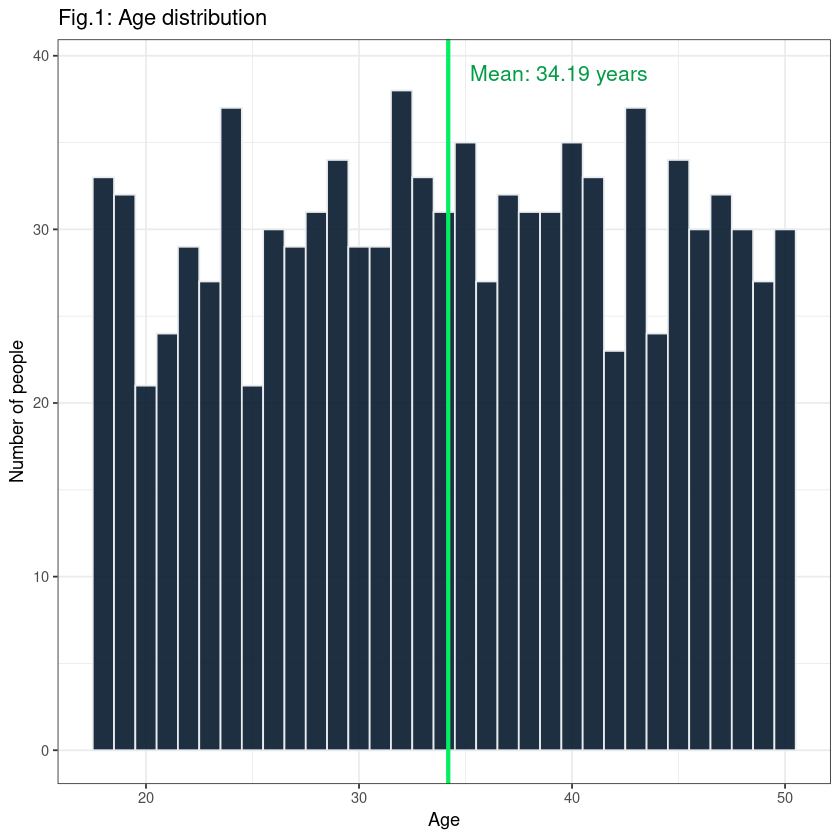

In [51]:
ggplot(df_data, aes(x = age)) + 
  geom_histogram(binwidth = 1, fill="#05192d", color = "#e9ecef", alpha = 0.9) +
  geom_vline(xintercept = mean(df_data$age), color = "#03ef62", linewidth = 1.2) +
  annotate("text", x = mean(df_data$age) + 1, y = max(table(df_data$age)) + 1, 
           label = paste("Mean:", round(mean(df_data$age), 2), "years"),
		   color = "#029c45",
		   size = 4.5,
		   hjust = 0) +
  theme_bw() +
  labs(title = "Fig.1: Age distribution",
	   x = "Age",
	   y = "Number of people")

From the Figure 1, it is observed that the ages of the people in the study range from 18 to 50 years old. The distribution of the ages seem quite uniform with a slight lower number of individuals with lower ages (<25). However, the average number of people per age is given by:

In [52]:
mean_cases <- df_data %>% 
  group_by(age) %>% 
  summarise(nr_cases = n()) %>% 
  pull(nr_cases) %>% 
  mean()

paste("The average number of individuals per age is", round(mean_cases, digits = 0), "people.")

[1] "The average number of individuals per age is 30 people."

This means that per each age number, there is an average representation of 30 individuals.

### Medical conditions
Regarding the different medical conditions observed in the analyzed individuals, it was developed the following plot:

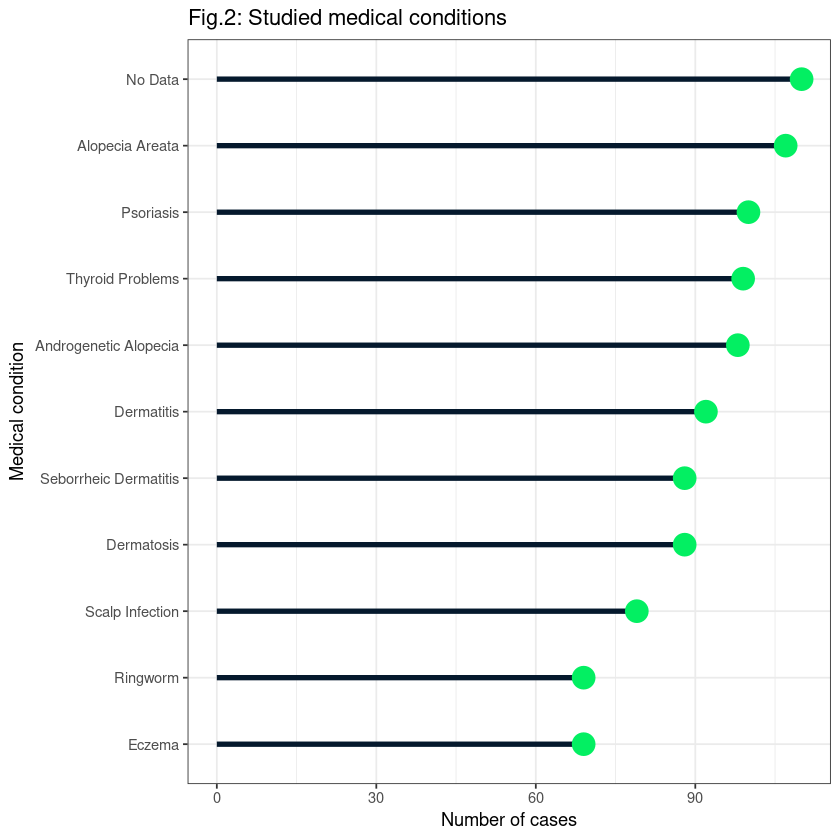

In [53]:
df_data %>%
  group_by(medical_conditions) %>% 
  summarise(nr_cases = n()) %>% 
  arrange(nr_cases) %>%
  mutate(medical_conditions = factor(medical_conditions,
                                     levels = medical_conditions)) %>%
  ggplot(aes(x = medical_conditions, y = nr_cases)) +
  geom_segment(aes(xend = medical_conditions, yend = 0), 
               color = "#05192d", 
               linewidth = 1.5) +
  geom_point(size = 6, color = "#03ef62") +
  coord_flip() +
  theme_bw() +
  labs(title = "Fig.2: Studied medical conditions",
       y = "Number of cases",
       x = "Medical condition")

As observed in Figure 2, there are a lot of cases where there is no medical records associated ("No Data"). Futhermore, it is observed that the two highest conditions are **Alopecia Areata** [link](https://en.wikipedia.org/wiki/Alopecia_areata) and **Psoriasis** [link](https://en.wikipedia.org/wiki/Psoriasis). The lowest recorded cases are **Eczema** [link](https://en.wikipedia.org/wiki/Dermatitis) and **Ringworm** [link](https://en.wikipedia.org/wiki/Dermatophytosis).

### Nutritional deficiencies
Similarly, the different nutritional deficiencies observed in the analyzed individuals can be seen in the plot below:

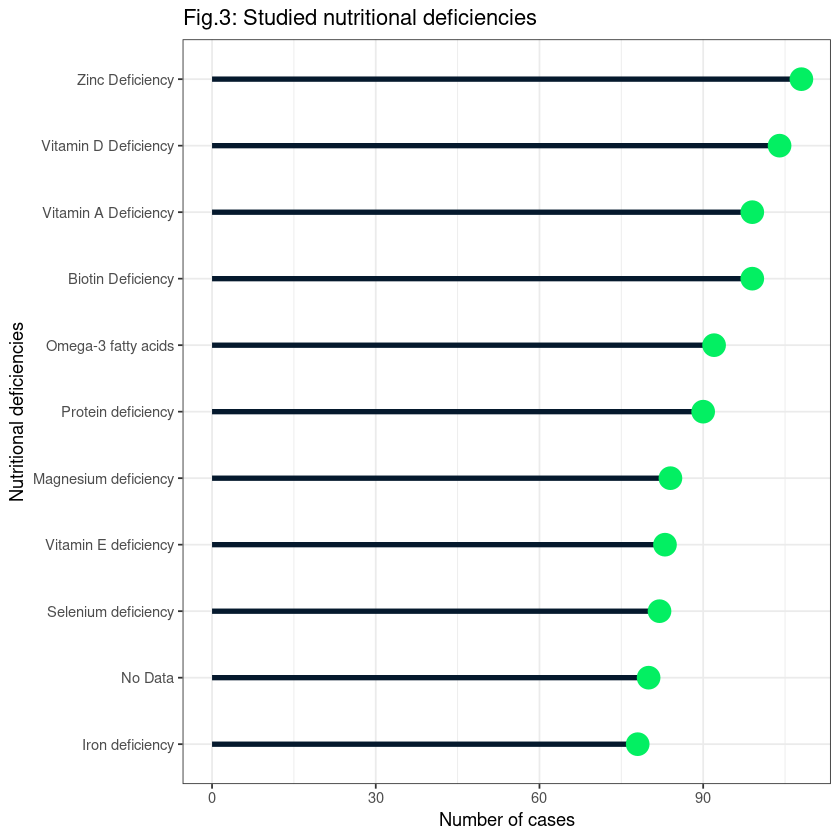

In [54]:
df_data %>%
  group_by(nutritional_deficiencies) %>% 
  summarise(nr_cases = n()) %>% 
  arrange(nr_cases) %>%
  mutate(nutritional_deficiencies = factor(nutritional_deficiencies,
                                           levels = nutritional_deficiencies)) %>%
  ggplot(aes(x = nutritional_deficiencies, y = nr_cases)) +
  geom_segment(aes(xend = nutritional_deficiencies, yend = 0),
               color = "#05192d",
               linewidth = 1.5) +
  geom_point(size = 6, color = "#03ef62") +
  coord_flip() +
  theme_bw() +
  labs(title = "Fig.3: Studied nutritional deficiencies",
       y = "Number of cases",
       x = "Nutritional deficiencies")

As observed, in this case there also a few cases of cases where there is no nutritional deficiencies records associated ("No Data"). Also from the plot, it is observed that the two highest deficiencies are **Zinc** and **Vitamin D**. The lowest recorded cases of nutritional deficiencies are **Iron** and **Selenium**.

## 🎞️ Level 2: Visualization

This section approaches the problem by visualizing further on the  dataset, but also opens the study on understanding the correlations between the data.

Three questions are proposed by the competition description. However, other observations are analyzed.

1. What is the proportion of patients with hair loss in different age groups?
2. What factors are associated with hair loss? 
3. What does hair loss look like under different stress levels?

### Proportion of patients with hair loss regarding age
The distribution of the proportion of patients with hair loss in different age groups is given by the plot:

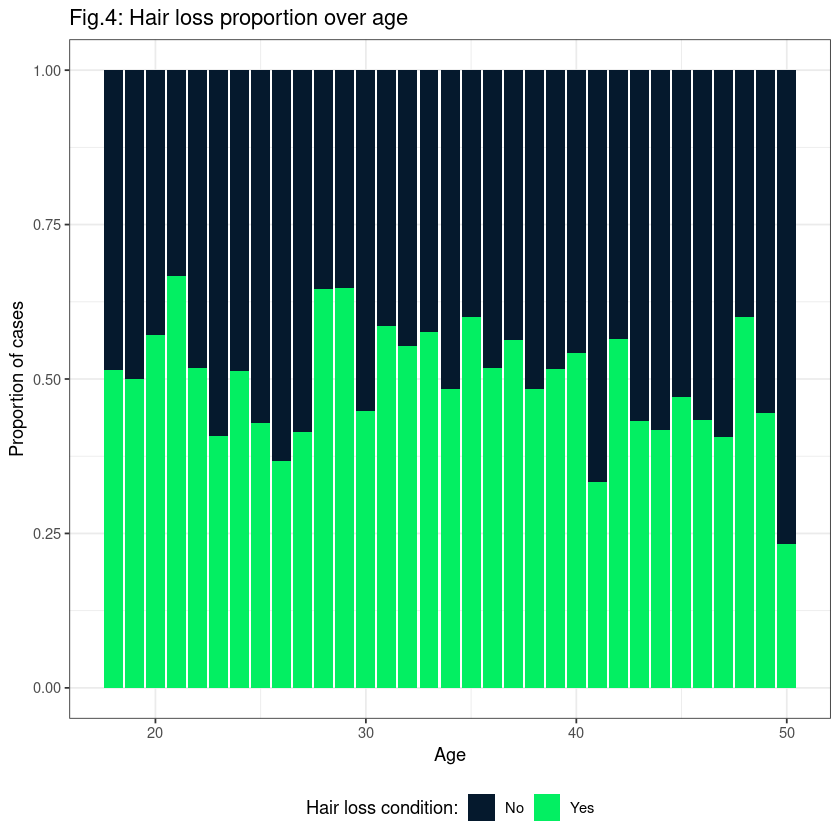

In [55]:
df_data %>%
  group_by(age, hair_loss) %>%
  reframe(nr_cases = n()) %>%
  ggplot(aes(fill = factor(hair_loss), y = nr_cases, x = age)) + 
  geom_bar(position="fill", stat="identity") +
  scale_fill_manual(values = custom_colors) +
  theme_bw() + 
  theme(legend.position = "bottom") +
  labs(title = "Fig.4: Hair loss proportion over age",
	   x = "Age",
       y = "Proportion of cases",
       fill = "Hair loss condition:") 

The plot shows that the cases of hair loss are quite uniform, however it seems that the cases of hair losses **do not increase** with the age, as common sense tells us. This could be because the sample of older individuals is not correctly distributed by being biased towards "No hair loss condition" or that age is not a real indicator (predictor) for hair loss.

### Age grouping according to its predictive power
In the analyzed dataset, the age is a numeric (continuous) variable while all the other variables are categorical. And because there are certain age numbers that might have more or less cases of hair loss, it is necessary to categorize the ages into groups to make it uniform.
Thus, the ages should to be grouped according to its capability in predicting the hair loss condition and also the number of cases per group. Therefore, instead of trying to guess these age groups (e.g.: young - below 25, Aduld - 40-50, etc.), I analysed the variable age to understand and predict the hair loss condition. To do it so, I applied the following methods: 

 - **Weight of Evidence (WoE):** Measures the predictive power of an independent variable in relation to the dependent variable (target). It quantifies how much the presence of a particular attribute increases or decreases the likelihood of the outcome.
- **Information Value (IV):** Summarizes the overall predictive power of a variable. It helps in variable selection and assessing the strength of predictors.

Below, it is observed the results of this methodology and the optimal binning to group the age variable.

ℹ Creating woe binning ...


✔ Binning on 999 rows and 2 columns in 00:00:00


variable,bin,count,count_distr,neg,pos,posprob,woe,bin_iv,total_iv,breaks,is_special_values
<chr>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
age,"[-Inf,20)",65,0.06506507,32,33,0.5076923,0.04078175,0.0001082091,0.08417035,20,FALSE
age,"[20,23)",74,0.07407407,31,43,0.5810811,0.33722300,0.0083517076,0.08417035,23,FALSE
age,"[23,28)",144,0.14414414,82,62,0.4305556,-0.26957477,0.0104050800,0.08417035,28,FALSE
age,"[28,30)",65,0.06506507,23,42,0.6461538,0.61218550,0.0236856461,0.08417035,30,FALSE
age,"[30,41)",351,0.35135135,163,188,0.5356125,0.15270186,0.0081799975,0.08417035,41,FALSE
age,"[41,49)",243,0.24324324,133,110,0.4526749,-0.17985867,0.0078440450,0.08417035,49,FALSE
age,"[49, Inf)",57,0.05705706,38,19,0.3333333,-0.68313709,0.0255956676,0.08417035,Inf,FALSE


ℹ Converting into woe values ...


✔ Woe transformating on 999 rows and 1 columns in 00:00:00


$age


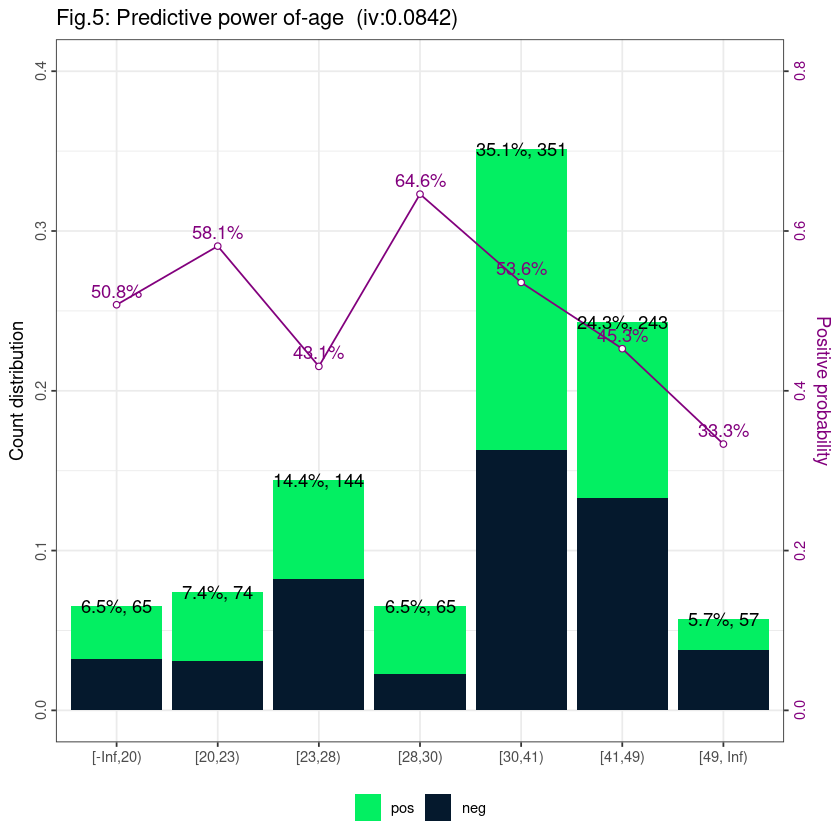

In [56]:
# Perform binning on 'age'
# The "age" and "hair_loss" must be both numeric variables
df_age <- df_data %>% 
  transmute(age, 
		   hair_loss = ifelse(hair_loss == "No", 0, 1))

bins <- woebin(df_age, y = "hair_loss", x = "age", positive = "1")

# View the binning results for 'age'
bins$age

# Apply WoE transformation
df_woe <- woebin_ply(df_age, bins)

# Calculate IV values for all variables
iv <- iv(df_woe, y = "hair_loss")

# View the IV for 'age'
# iv[iv$variable == "age_woe", ]

woebin_plot(bins$age,
			title = "Fig.5: Predictive power of",
			show_iv = TRUE,
			line_color = "#82007d",
			bar_color = c("#03ef62", "#05192d"))


From the plot above, one can conclude the following:

 - The purple line shows the positive probability (hair loss occurs) for each age bin. There is a peak in positive probability for the age bin of 28-29 years, where the positive probability is the highest at 64.6%. This indicates that individuals in this age range have the highest likelihood of experiencing the hair loss. After this peak, the positive probability decreases, with the lowest value observed in the last bin 49-50 years at 39.3%, which sounds counterintuitive, however it is the result out of this model.

- The bar chart shows the distribution of observations across different age bins, separated by positive (pos) and negative (neg) classes. The bin 30-40 years has the largest number of observations, with a 35.1% count distribution, indicating that most of the data falls within this range. The bins 23-27 and 41-48 years old also have relatively high observation counts, with 14.4% and 24.3%, respectively.

- The Information Value (IV) for the 'age' variable is 0.0842, which is considered a weak predictor (an IV between 0.02 and 0.1 indicates weak predictive power). While 'age' provides some information for predicting hair loss, it may not be a strong standalone predictor.

Given the weak predictive power of the age variable, it is necessary to combine age with other predictors to improve the overall model performance.
Thus, further investigation into interaction effects between 'age' and other variables (such as medical condition, nutrition, etc.) might reveal stronger patterns.

Based on the weak predictive power of age and also based that certain bins (groups) have a large quantity of one class over the other, it is decided to group the age into two bins. The first group is for ages below 28 years old, and the second group is with ages equal or above 28 years old.


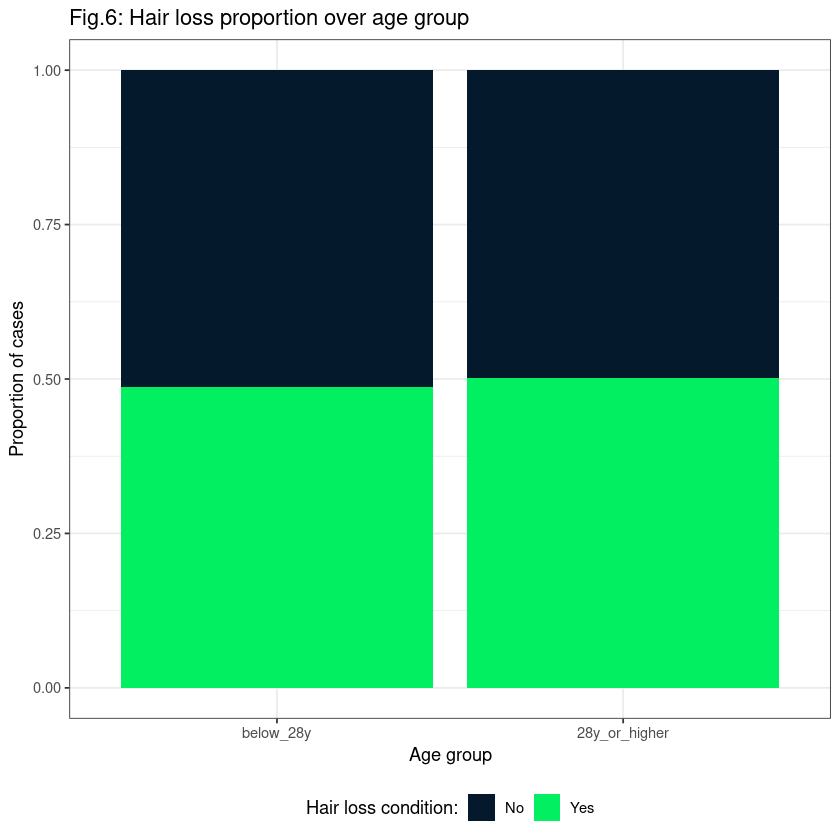

In [57]:
df_data_viz <- df_data%>% 
  mutate(age_group = factor(
	  ifelse(age < 28, "below_28y", "28y_or_higher"),
	  levels = c("below_28y", "28y_or_higher")))
  

df_data_viz %>%
  group_by(age_group, hair_loss) %>%
  reframe(nr_cases = n()) %>%
  ggplot(aes(fill = factor(hair_loss), y = nr_cases, x = age_group)) + 
  geom_bar(position="fill", stat="identity") +
  scale_fill_manual(values = custom_colors) +
  theme_bw() + 
  theme(legend.position = "bottom") +
  labs(title = "Fig.6: Hair loss proportion over age group",
	   x = "Age group",
       y = "Proportion of cases",
       fill = "Hair loss condition:")

After assessing the age groups, it is analyzed if the different variables are correlated between each other. To do such a thing, it is applied a **Cramer's V test** between the pairs of variables. Cramer's V is a statistical measure used to assess the strength of association between two categorical variables. It ranges from 0 (no association) to 1 (perfect association) and is based on the chi-squared statistic, adjusted for the sample size and dimensions of the contingency table. In Figure 7, one can see the results of each test for the associacion of each pair of variables.

In [58]:
df_data_viz <- df_data_viz %>%
  rename_with(tolower)    # Make all column names lowercase

# Get all column names that are factors in the dataframe, excluding "id"
factor_cols <- setdiff(names(df_data_viz)[sapply(df_data_viz, is.factor)], "id")

# Initialize an empty data frame to store results
results_df <- data.frame(
  variable_x = character(),
  variable_y = character(),
  cramers_v = numeric(),
  stringsAsFactors = FALSE
)

# Loop over all combinations of factor columns
for (i in 1:(length(factor_cols) - 1)) {
  for (j in (i + 1):length(factor_cols)) {
    col_x <- factor_cols[i]
    col_y <- factor_cols[j]
    
    # Apply the function on each pair
    result <- cramerV(df_data_viz[[col_x]], df_data_viz[[col_y]])
    
    # Store both combinations in the data frame
    results_df <- rbind(
      results_df,
      data.frame(variable_x = col_x, variable_y = col_y, cramers_v = result, stringsAsFactors = FALSE),
      data.frame(variable_x = col_y, variable_y = col_x, cramers_v = result, stringsAsFactors = FALSE)
    )
  }
}

# Display the resulting data frame
head(results_df, n = 3)

,variable_x,variable_y,cramers_v
,<chr>,<chr>,<dbl>
Cramer V,genetics,hormonal_changes,0.007873
Cramer V1,hormonal_changes,genetics,0.007873
Cramer V2,genetics,medical_conditions,0.083090


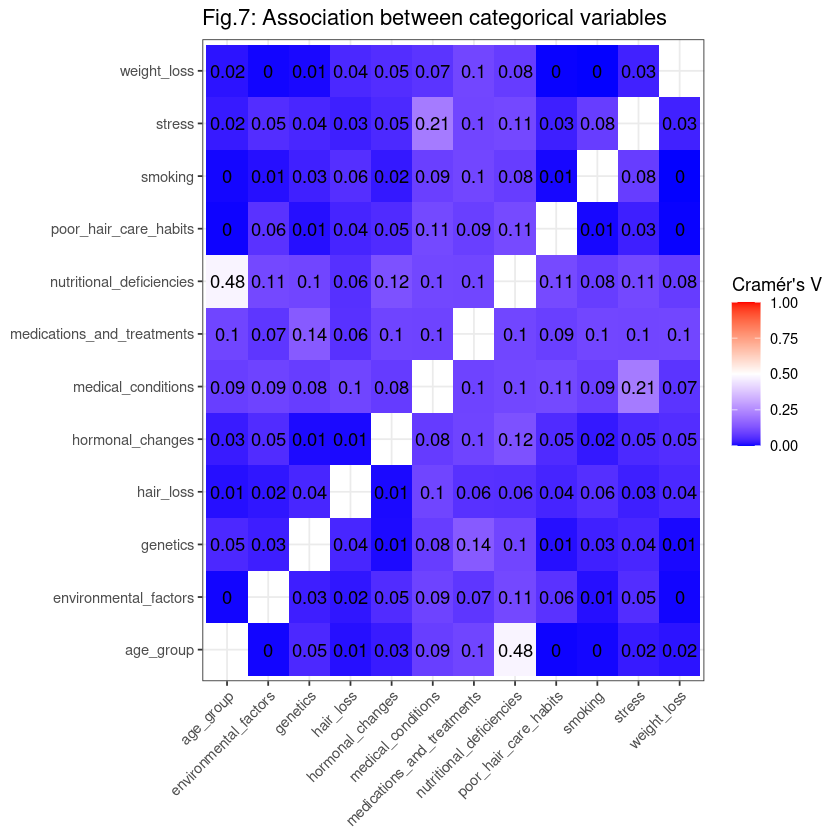

In [59]:
# Reshape data for the heatmap
heatmap_data <- reshape2::dcast(results_df, variable_x ~ variable_y, value.var = "cramers_v")

# Melt data for ggplot2 (needed if you want to create a symmetrical matrix)
melted_data <- reshape2::melt(heatmap_data, id.vars = "variable_x", variable.name = "variable_y", value.name = "cramers_v")

# Remove any rows with NA values before plotting
melted_data <- na.omit(melted_data)

# Create the heatmap
ggplot(melted_data, aes(x = variable_y, y = variable_x, fill = cramers_v)) +
  geom_tile() +
  geom_text(aes(label = round(cramers_v, 2)), color = "black") + # Display values in each cell
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0.5, limit = c(0, 1), name = "Cramér's V") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(x = NULL, y = NULL, title = "Fig.7: Association between categorical variables")

From the heatmap in Figure 7, one can conclude:

- The variable hair loss (the target variable) shows low association values with most predictors. The highest association with hair loss is observed with medical conditions (0.10). This is relatively weak association but could indicate some level of relationship.

- The strongest association in the heatmap is between age group (see Fig. 6) and nutritional deficiencies (0.48), suggesting a moderate relationship. The medical conditions and stress also show a weak-to-moderate association (0.21).

- Most predictors show low pairwise associations with each other (as many variables have near-zero association values with others), suggesting that multicollinearity might not be a significant issue in the dataset.

This means that the uniform distribution of low association values suggests a diverse predictor set without strong redundancy, which is beneficial for machine learning models.

Even though stress does not have strong association with hair loss, it has a larger association with the medical conditions (which is the largest association with hair loss). Thus, the distribution of the proportion of people with hair loss with different stress levels is given by the plot:

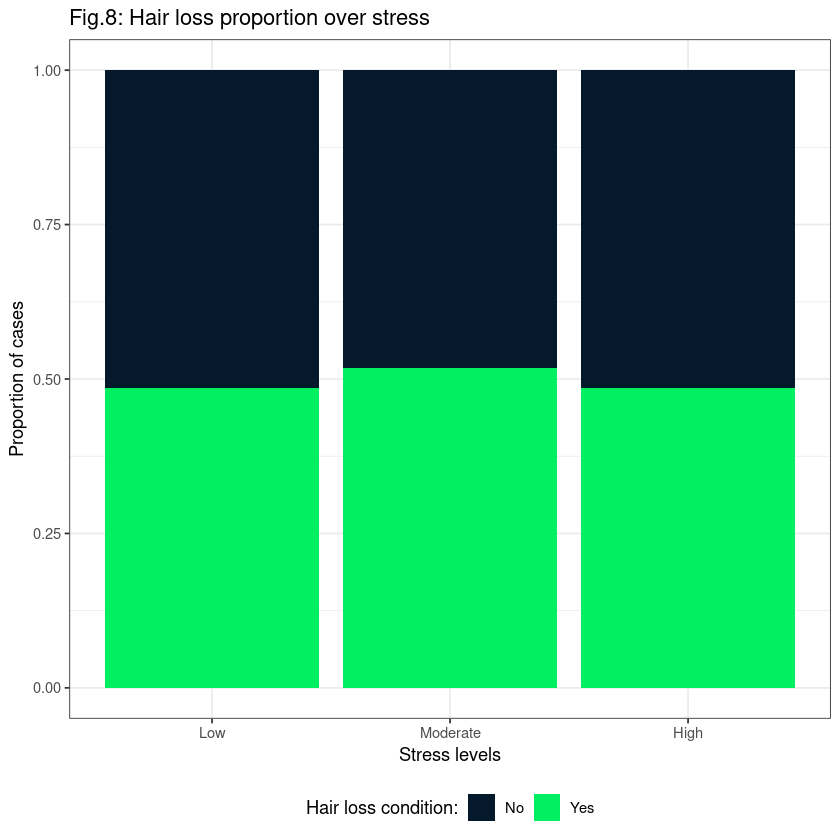

In [60]:
df_data %>%
  group_by(stress, hair_loss) %>%
  reframe(nr_cases = n()) %>%
  ggplot(aes(fill = hair_loss,
             y = nr_cases,
             x = stress)) + 
  geom_bar(position = "fill", stat = "identity") +
  scale_fill_manual(values = custom_colors) +
  theme_bw() + 
  theme(legend.position = "bottom") +
  labs(title = "Fig.8: Hair loss proportion over stress",
	   x = "Stress levels",
       y = "Proportion of cases",
       fill = "Hair loss condition:") 

According to the plot, it is observed that the stress levels might be a **weak indicator** to predict hair loss. As it seems that there is a slight increase of the condition with the increase of stress.

## 🤖 Level 3: Machine Learning

This section approaches the problem by developing a classification algorithm to predict hair loss based on the best registered input information on the  dataset. This work is divided into two sections, the first is to assess the best indicators to predict hair loss over the weak indicators that do not contribute for the prediction. The second section is the development and testing of several models to predict hair loss.

Three questions are proposed by the competition description. However, other observations are analyzed.

1. A classification model can be built to predict whether an individual will suffer from hair loss based on given factors.
2. Use cluster analysis to explore whether there are different types of hair loss groups in the data set.
3. Use algorithms such as decision trees or random forests to identify the key factors that best predict hair loss.

**Content:**

 - Data preparation for modelling
 - Principal component analysis (PCA) - Observe data variability
 - Variables importance assessment - Choosing the best predictors for classify hair loss
 - Hair loss prediction modelling - Traning and testing of several models

### Data preparation for modelling

**Initial dataset:**

In [61]:
head(df_data_viz)

id,genetics,hormonal_changes,medical_conditions,medications_and_treatments,nutritional_deficiencies,stress,age,poor_hair_care_habits,environmental_factors,smoking,weight_loss,hair_loss,age_group
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,No,below_28y
148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,No,28y_or_higher
155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,No,below_28y
118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,No,28y_or_higher
111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,Yes,28y_or_higher
139661,Yes,No,Psoriasis,Antibiotics,Magnesium deficiency,Low,37,No,Yes,No,Yes,Yes,28y_or_higher


This section prepares the dataset for modeling by performing several preprocessing steps. It begins by cleaning the data, removing rows with missing values (the ones mention Level 1 as "No Data") and excluding the id column, which is not relevant for predictive modeling. Predictors are then transformed into numeric or binary formats, with categorical variables such as genetics, age_group, and stress mapped to numeric values (e.g., "No" to 0 and "Yes" to 1). For example, age_group is recoded as 0 for "below_28y" and 1 for "28y_or_higher," while stress is given ordinal values to represent its intensity (Low stress = 0, moderate = 1, and high = 2).

The code then performs **one-hot encoding** for multi-category predictors like medical_conditions, medications_and_treatments, and nutritional_deficiencies. Afterward, column names are cleaned to replace spaces or special characters with underscores, ensuring consistency and compatibility for later steps.

Once the dataset is processed, the code sets up a **training scheme for the model**. It was decided to use **5-fold cross-validation, repeated three times, to evaluate model performance reliably**. This method splits the data into five groups, training on four and testing on the remaining one in each iteration, and repeats the process three times for robustness. The target variable hair_loss is prepared as a binary factor with levels "No" (no baldness) and "Yes" (baldness). The training scheme also includes functionality to calculate class probabilities, use **metrics like sensitivity and specificity**, and **tune parameters through grid search**. This ensures the dataset and training approach are fully optimized for building a reliable classification model.

In the table below, one can see the final dataset that will be used for modelling.

**Final dataset - For modelling:**

In [62]:
## Prepare dataset for modelling
# Remove missing data rows
# Remove id as an explanatory variable
# Convert all predictors to numeric values
df_mdl <- df_data_viz %>%
  select(-id) %>% 
  transmute(genetics = ifelse(genetics == "No", 0, 1),
			age_group = case_when(
				age_group == "below_28y" ~ 0,
				age_group == "28y_or_higher" ~ 1),
            hormonal_changes = ifelse(hormonal_changes == "No", 0, 1),
            medical_conditions = as.character(medical_conditions),
            medications_and_treatments = as.character(medications_and_treatments),
            nutritional_deficiencies = as.character(nutritional_deficiencies),
            stress = ifelse(stress == "Low", 0, ifelse(stress == "Moderate", 1, 2)),
            poor_hair_care_habits = ifelse(poor_hair_care_habits == "No", 0, 1),
            environmental_factors = ifelse(environmental_factors == "No", 0, 1),
            smoking = ifelse(smoking == "No", 0, 1),
            weight_loss = ifelse(weight_loss == "No", 0, 1),
            hair_loss = factor(hair_loss, levels = c("No", "Yes"), labels = c(0, 1))) %>%
  filter(if_all(everything(), ~ . != "No Data")) %>% 
# One-hot encoding of categorical predictors
  dummy_cols(remove_first_dummy = FALSE, 
             select_columns = c("medical_conditions",
                                "medications_and_treatments",
                                "nutritional_deficiencies"),
             remove_selected_columns = TRUE)


colnames(df_mdl) <- colnames(df_mdl) %>%
  str_replace_all(" ", "_") %>%
  str_replace_all("-", "_")

head(df_mdl, n = 3)

## Prepare training scheme
# 5-fold cross-validation (3 repeats)
train_control <- trainControl(method = "repeatedcv",
							  number = 5,
							  repeats = 3,
							  summaryFunction = twoClassSummary,
							  savePredictions = TRUE, 
                              classProbs = TRUE,
							  search = "grid",
                              verboseIter = FALSE)

df_mdl$hair_loss <- factor(df_mdl$hair_loss, levels = c(0, 1), labels = c("No", "Yes"))

genetics,age_group,hormonal_changes,stress,poor_hair_care_habits,environmental_factors,smoking,weight_loss,hair_loss,medical_conditions_Alopecia_Areata,⋯,nutritional_deficiencies_Biotin_Deficiency,nutritional_deficiencies_Iron_deficiency,nutritional_deficiencies_Magnesium_deficiency,nutritional_deficiencies_Omega_3_fatty_acids,nutritional_deficiencies_Protein_deficiency,nutritional_deficiencies_Selenium_deficiency,nutritional_deficiencies_Vitamin_A_Deficiency,nutritional_deficiencies_Vitamin_D_Deficiency,nutritional_deficiencies_Vitamin_E_deficiency,nutritional_deficiencies_Zinc_Deficiency
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,0,2,1,1,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
0,0,0,1,1,1,0,1,0,0,⋯,0,0,0,0,1,0,0,0,0,0
1,1,1,1,1,1,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,0


### PCA - Principal components analysis

Principal component analysis (PCA) is a dimensionality reduction technique widely used to transform high-dimensional datasets into a smaller number of components, while retaining as much variation as possible. This is especially necessary when working with datasets that have a large number of correlated predictors, as in the case of analyzing hair loss data. By projecting the data onto principal components, PCA helps to reduce noise and redundancy, enabling a clearer understanding of the underlying structure of the data. In this context, PCA aids in visualizing how the predictors (e.g., medical conditions, nutritional deficiencies, smoking, etc.) contribute to the variability within the dataset and how they separate the two target groups: individuals with and without hair loss. Furthermore, it helps to address multicollinearity, which can adversely affect classification model performance.

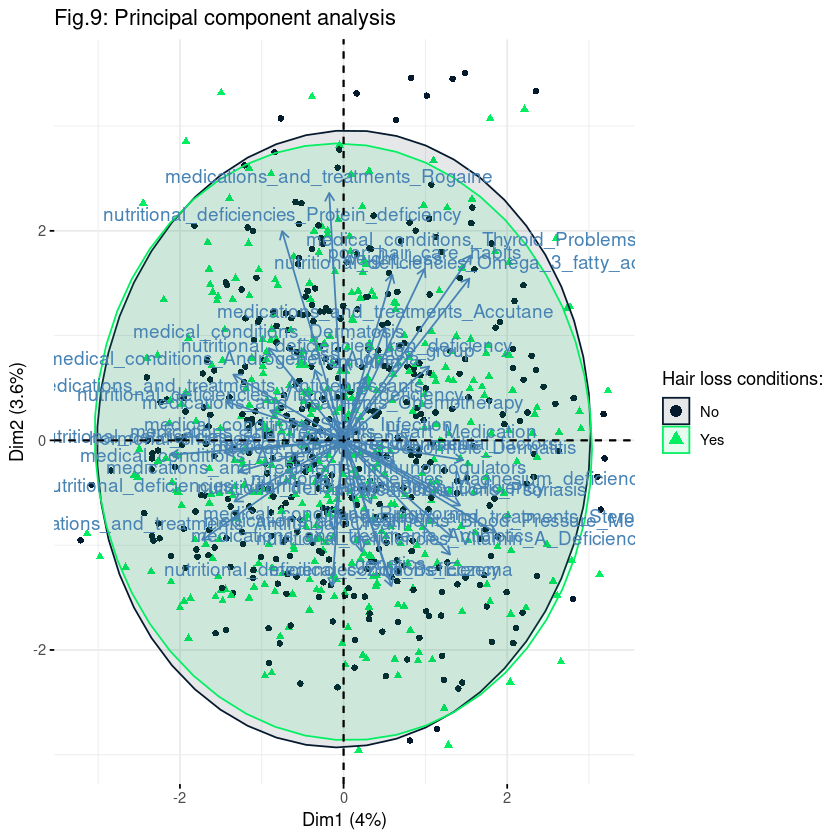

In [63]:
## Set seed for reproducibility
set.seed(314)

hairloss.pca <- PCA(df_mdl[, -which(names(df_mdl) == "hair_loss")],
                    graph = FALSE)


fviz_pca_biplot(hairloss.pca,
				geom.ind = "point", # show points only (nbut not "text"),
                col.ind = df_mdl$hair_loss, # color by groups
                palette = c("#05192d", "#03ef62"),
                addEllipses = TRUE, # Concentration ellipses
                legend.title = "Hair loss conditions:",
			    title = "Fig.9: Principal component analysis")

The PCA biplot provides a graphical representation of the relationships between the predictors and their influence on hair loss conditions. The plot illustrates two principal components, Dim1 and Dim2, which together account for a limited percentage of the total variance (4% and 3.6%, respectively). This low explained variance suggests that the dataset is highly complex, with variability spread across many dimensions rather than concentrated in a few. The points, colored by the hair loss condition (navy blue for "No" and green for "Yes"), show significant overlap, highlighting **the challenge in classifying the target variable based on the given predictors**. The concentration ellipses indicate the general grouping tendencies of each condition, but their overlap reaffirms the difficulty in finding distinct boundaries between the two groups. Additionally, the arrows representing predictors show their contributions to the components, with longer arrows suggesting greater influence on the variability captured by the PCA dimensions. **The dense clustering of predictor labels around the origin suggests limited discriminatory power, underscoring the need for additional features or advanced modeling techniques to improve classification accuracy.**

### Identify best indicators (input) to predict hair loss

To visualize which predictors are better for the classification model, I trained a **Random Forest** model using cross-validation to predict hair_loss and evaluated its performance based on the ROC metric. **The importance of each predictor was assessed, identifying the most influential features for the model. Only predictors with high importance scores were retained for further analysis, ensuring the dataset is streamlined and focused on the most relevant variables.** A visual representation of feature importance can be seen below, highlighting the most impactful predictors. The final dataset that will be used to train the model includes these top predictors and the target variable (hair_loss).

genetics,age_group,weight_loss,poor_hair_care_habits,hormonal_changes,smoking,environmental_factors,stress,hair_loss
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,1,0,1,0,0,1,2,No
0,0,1,1,0,0,1,1,No
1,1,0,1,1,0,1,1,No
0,1,0,0,0,1,1,1,Yes
1,1,1,0,0,0,1,0,Yes
1,1,0,1,0,1,0,2,No


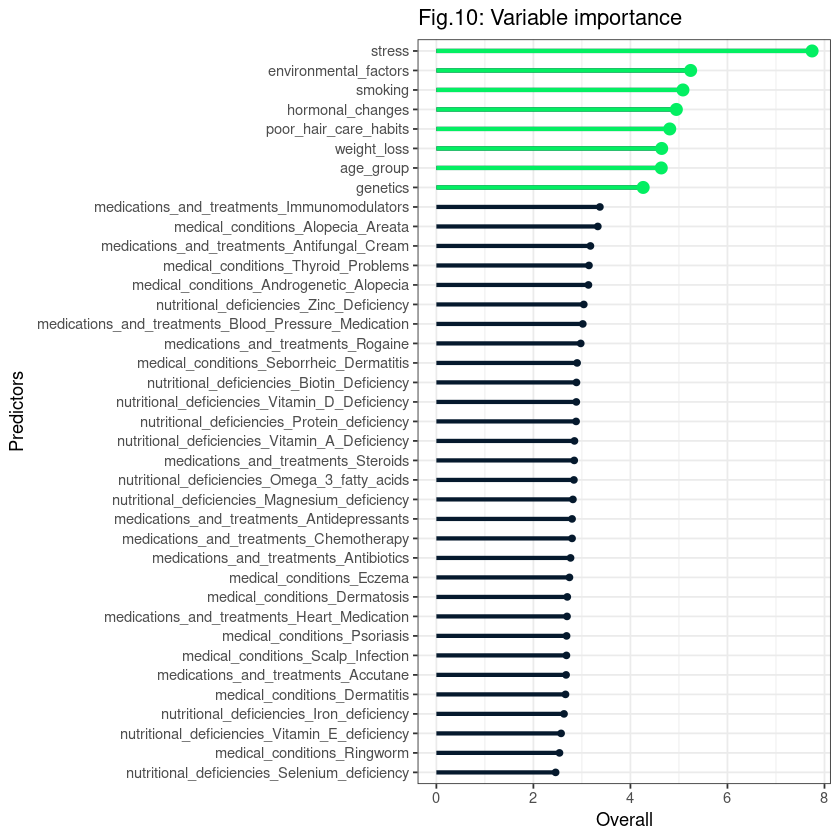

In [64]:
set.seed(314)

## Train the random forest model
model_varimp <- caret::train(hair_loss ~ .,
					  data = df_mdl,
					  method = "ranger",
					  metric = "ROC",
					  trControl = trainControl(method = "cv",
											   number = 5,
											   summaryFunction = twoClassSummary,
											   classProbs = TRUE,
											   savePredictions = TRUE,
											   verboseIter = FALSE),
					  importance = "impurity")

df_varimp <- varImp(model_varimp, scale = FALSE)$importance %>% 
  as.data.frame() %>%
  rownames_to_column() %>%
  arrange(Overall) %>%
  mutate(rowname = forcats::fct_inorder(rowname))

## Dataset with only the best predictors
df_high_varimp <- df_varimp %>% 
  filter(Overall > 4)

## Plot variable importance
df_varimp %>%
  ggplot(aes(x = rowname, y = Overall)) +
  geom_segment(aes(xend = rowname, yend = 0),
               color = "#05192d", 
               linewidth = 1.2) +
  geom_point(size = 1.5, color = "#05192d") +
  geom_segment(data = df_high_varimp,
               aes(xend = rowname, yend = 0),
               color = "#03ef62",
               linewidth = 1.2) +
  geom_point(data = df_high_varimp, 
             size = 3, color = "#03ef62") +
  coord_flip() +
  labs(y = "Overall",
	   x = "Predictors",
	   title = "Fig.10: Variable importance") +
  theme_bw()

df_mdl_filter <- df_mdl %>%
  select(all_of(df_high_varimp$rowname), hair_loss)

head(df_mdl_filter)

From the analysis above, we can observe the best predictors to classify hair loss condition. From 38 predictors, 8 of them had an overall variable importance score above 4. **Therefore, I selected these 8 predictors for my classification model.**

As seen, the best predictor is **stress** even though in Figures 7 and 8 such conclusion couldn't be achieved. Also from this result, one can conclude that medical conditions, nutritional deficiencies, and medications and treatments are not good enough for the classification model.

In summary, the plot highlights that **lifestyle-related factors** (like stress and smoking) and environmental influences are the primary drivers in the model, while medical and nutritional factors contribute more subtly.

### Classification modelling

To ensure balanced representation of the target variable (hair_loss) across the training and testing datasets, the data was split using stratified sampling. A seed value was set to guarantee reproducibility. **Approximately 70% of the data was allocated to the training set, while the remaining 30% formed the testing set.** The proportions of the target label were verified in both datasets to confirm similar proportions of **50% per each target class**.

In [65]:
# Split the data into training and testing sets with similar proportions of the target label
set.seed(314)

train_index <- createDataPartition(df_mdl_filter$hair_loss,
                                   p = 0.7,
                                   list = FALSE)  # Stratified sampling

df_train <- df_mdl_filter[train_index, ]
df_test <- df_mdl_filter[-train_index, ]

# Check proportions in training and testing sets
print("Train dataset:")
print(prop.table(table(df_train$hair_loss)))  # Proportion of labels in training set

print("Test dataset:")
print(prop.table(table(df_test$hair_loss)))   # Proportion of labels in testing set

[1] "Train dataset:"

       No       Yes 
0.4955908 0.5044092 
[1] "Test dataset:"

       No       Yes 
0.4958678 0.5041322 


In [66]:
prop.table(table(df_test$hair_loss))


       No       Yes 
0.4958678 0.5041322 

In this work, it was trained several models with hyperparameter optimization. The training scheme was designed to ensure reliable model performance evaluation and optimization. The method uses **5-fold cross-validation, repeated 3 times**, to assess the model's ability to generalize across different subsets of the data. This helps reduce variability and provides a comprehensive evaluation of the model's predictive accuracy.

**A grid search strategy is employed for hyperparameter tuning**, with a predefined values per model, ensuring a systematic exploration of parameter combinations to identify the best-performing model configuration.

Each model is evaluated using the **ROC (Receiver Operating Characteristic) metric**, which measures its ability to distinguish between classes. Specifically, it looks at the trade-off between the true positive rate (how often the model correctly identifies the positive class) and the false positive rate (how often the model incorrectly predicts the positive class). A high ROC value indicates the model is good at separating the classes, making it a reliable metric for binary classification tasks like predicting hair_loss.

The trained models are the following:

#### Naive Bayes

A probabilistic model based on Bayes' Theorem, assuming independence among predictors. It is simple yet effective, particularly for classification tasks with categorical data.

_Hyperparameters grid:_
 - fL = [0, 0.5, 1]
 - usekernel = [TRUE, FALSE]
 - adjust = [0.5, 1, 1.5]

In [67]:
set.seed(314)

nb_hyper_param <- expand.grid(fL = c(0, 0.5, 1),
							  usekernel = c(TRUE, FALSE),
							  adjust = c(0.5, 1, 1.5))

# Train Naive Bayes model
nb_model <- caret::train(hair_loss ~ ., 
						 data = df_train, 
						 method = "nb",
						 metric = "ROC",
						 trControl = train_control,
						 tuneGrid = nb_hyper_param)   # Tuning parameter

# View model details
# print(nb_model)

# Make predictions on the test set
nb_predictions <- predict(nb_model, newdata = df_test)

# Get predicted probabilities
# nb_probabilities <- predict(nb_model, newdata = df_test, type = "prob")

# Evaluate model performance
confusion_matrix <- caret::confusionMatrix(nb_predictions, df_test$hair_loss)
confusion_matrix

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  41  38
       Yes 79  84
                                         
               Accuracy : 0.5165         
                 95% CI : (0.4516, 0.581)
    No Information Rate : 0.5041         
    P-Value [Acc > NIR] : 0.3740430      
                                         
                  Kappa : 0.0303         
                                         
 Mcnemar's Test P-Value : 0.0002173      
                                         
            Sensitivity : 0.3417         
            Specificity : 0.6885         
         Pos Pred Value : 0.5190         
         Neg Pred Value : 0.5153         
             Prevalence : 0.4959         
         Detection Rate : 0.1694         
   Detection Prevalence : 0.3264         
      Balanced Accuracy : 0.5151         
                                         
       'Positive' Class : No             
                                         

#### Logistic Regression

A statistical model that predicts the probability of a binary outcome by modeling the relationship between the target and predictors using a logistic function.

_Hyperparameters grid:_
 - No hyperparameters to optimize.

In [68]:
set.seed(314)

# Train logistic regression model with multiple predictors
logit_model <- caret::train(hair_loss ~ .,                  # All predictors
                     data = df_train,
                     method = "glm",               # Generalized linear model
                     family = "binomial",          # Logistic regression
					 metric = "ROC",
                     trControl = train_control)

# View model summary
# summary(logit_model)

# Make predictions on the test set
logit_predictions <- predict(logit_model, newdata = df_test)

# Get predicted probabilities
#logit_probabilities <- predict(logit_model, newdata = df_test, type = "prob")

# Evaluate model performance
confusion_matrix <- caret::confusionMatrix(logit_predictions, df_test$hair_loss)
confusion_matrix

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  63  60
       Yes 57  62
                                         
               Accuracy : 0.5165         
                 95% CI : (0.4516, 0.581)
    No Information Rate : 0.5041         
    P-Value [Acc > NIR] : 0.3740         
                                         
                  Kappa : 0.0332         
                                         
 Mcnemar's Test P-Value : 0.8533         
                                         
            Sensitivity : 0.5250         
            Specificity : 0.5082         
         Pos Pred Value : 0.5122         
         Neg Pred Value : 0.5210         
             Prevalence : 0.4959         
         Detection Rate : 0.2603         
   Detection Prevalence : 0.5083         
      Balanced Accuracy : 0.5166         
                                         
       'Positive' Class : No             
                                         

#### Support Vector Machine (SVM)

A supervised learning model that identifies the optimal hyperplane to separate classes in a high-dimensional feature space, often used with kernels for complex relationships.

_Hyperparameters grid:_
 - cost = [0.1, 1, 5, 10]
 - sigma = [0.001, 0.01, 0.1, 1]

In [69]:
set.seed(314)

svm_hyper_param <- expand.grid(C = c(0.1, 1, 5, 10),
							   sigma = c(0.001, 0.01, 0.1, 1))

# Train SVM model with multiple predictors
svm_model <- caret::train(
	hair_loss ~ .,            # All predictors
	data = df_train,          # Training data
	method = "svmRadial",     # SVM with Radial Basis Kernel
	metric = "ROC",
	trControl = train_control, # Train control settings
	tuneGrid = svm_hyper_param   # Tuning parameter
)

# View model summary
#print(svm_model)

# Make predictions on the test set
svm_predictions <- predict(svm_model, newdata = df_test)

# Get predicted probabilities
# svm_probabilities <- predict(svm_model, newdata = df_test, type = "prob")

# Evaluate model performance
svm_confusion_matrix <- caret::confusionMatrix(svm_predictions, df_test$hair_loss)
print(svm_confusion_matrix)

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  56  36
       Yes 64  86
                                          
               Accuracy : 0.5868          
                 95% CI : (0.5219, 0.6495)
    No Information Rate : 0.5041          
    P-Value [Acc > NIR] : 0.005991        
                                          
                  Kappa : 0.1719          
                                          
 Mcnemar's Test P-Value : 0.006934        
                                          
            Sensitivity : 0.4667          
            Specificity : 0.7049          
         Pos Pred Value : 0.6087          
         Neg Pred Value : 0.5733          
             Prevalence : 0.4959          
         Detection Rate : 0.2314          
   Detection Prevalence : 0.3802          
      Balanced Accuracy : 0.5858          
                                          
       'Positive' Class : No              
                                 

#### Random Forest 

An ensemble learning method that constructs multiple decision trees during training and combines their outputs to improve prediction accuracy and control overfitting.

_Hyperparameters grid:_
 - mtry = [1, 3, 6]
 - splitrule = ["gini", "extratrees"]
 - min.node.size = [1, 5, 10]

In [70]:
set.seed(314)

rf_hyper_param <- expand.grid(mtry = c(1,3,6),
							  splitrule = c("gini", "extratrees"),
							  min.node.size = c(1, 5, 10))

# Train random forest model with multiple predictors
rf_model <- caret::train(
	hair_loss ~ ., # All predictors
	data = df_train,
	method = "ranger",  # Random Forest
	metric = "ROC",
	trControl = train_control,
	tuneGrid = rf_hyper_param
)

# View model summary
#print(rf_model)

# Make predictions on the test set
rf_predictions <- predict(rf_model, newdata = df_test)

# Get predicted probabilities
# rf_probabilities <- predict(rf_model, newdata = df_test, type = "prob")

# Evaluate model performance
confusion_matrix <- caret::confusionMatrix(rf_predictions, df_test$hair_loss)
print(confusion_matrix)

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  60  44
       Yes 60  78
                                          
               Accuracy : 0.5702          
                 95% CI : (0.5053, 0.6335)
    No Information Rate : 0.5041          
    P-Value [Acc > NIR] : 0.0230          
                                          
                  Kappa : 0.1395          
                                          
 Mcnemar's Test P-Value : 0.1413          
                                          
            Sensitivity : 0.5000          
            Specificity : 0.6393          
         Pos Pred Value : 0.5769          
         Neg Pred Value : 0.5652          
             Prevalence : 0.4959          
         Detection Rate : 0.2479          
   Detection Prevalence : 0.4298          
      Balanced Accuracy : 0.5697          
                                          
       'Positive' Class : No              
                                 

#### XGBoost

An advanced gradient boosting algorithm that builds decision trees iteratively, optimizing performance by minimizing loss functions and reducing errors effectively.

_Hyperparameters grid:_
 - nrounds = [50, 100, 150]
 - max_depth = [3, 6, 9]
 - eta = [0.01, 0.1, 0.3]
 - gamma = [0, 1, 5]
 - colsample_bytree = [0.5, 0.75, 1]
 - min_child_weight = [1, 5, 10]
 - subsample = [0.5, 0.75, 1]

In [71]:
set.seed(314)

xgb_hyper_param <- expand.grid(nrounds = c(50, 100, 150), # Number of boost rounds
							   max_depth = c(3, 6, 9), # Maximum depth of a tree
							   eta = c(0.01, 0.1, 0.3), # Learning rate
							   gamma = c(0, 1, 5), # Minimum loss reduction
							   colsample_bytree = c(0.5, 0.75, 1), # Subsample ratio of columns
							   min_child_weight = c(1, 5, 10), # Minimum sum of instance weight in a child
							   subsample = c(0.5, 0.75, 1)) # Subsample ratio of training data

# Train xgboost model
xgb_model <- caret::train(
    hair_loss ~ ., 
    data = df_train, 
    method = "xgbTree",
	metric = "ROC",
    trControl = train_control, 
    tuneGrid = xgb_hyper_param,
	verbosity = 0)

# View model details and best parameters
# print(xgb_model)

# Make predictions on the test set
xgb_predictions <- predict(xgb_model, newdata = df_test)

# Evaluate model performance
confusion_matrix <- caret::confusionMatrix(xgb_predictions, df_test$hair_loss)
print(confusion_matrix)

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  62  46
       Yes 58  76
                                          
               Accuracy : 0.5702          
                 95% CI : (0.5053, 0.6335)
    No Information Rate : 0.5041          
    P-Value [Acc > NIR] : 0.0230          
                                          
                  Kappa : 0.1397          
                                          
 Mcnemar's Test P-Value : 0.2807          
                                          
            Sensitivity : 0.5167          
            Specificity : 0.6230          
         Pos Pred Value : 0.5741          
         Neg Pred Value : 0.5672          
             Prevalence : 0.4959          
         Detection Rate : 0.2562          
   Detection Prevalence : 0.4463          
      Balanced Accuracy : 0.5698          
                                          
       'Positive' Class : No              
                                 

#### Neural Networks (mlp)

A machine learning model inspired by the human brain, using layers of interconnected nodes (neurons) to learn complex patterns in data, suitable for both regression and classification tasks.

_Hyperparameters grid:_
 - size = [1, 5, 10, 50]

In [72]:
set.seed(314)

nn_hyper_param <- expand.grid(
  size = c(1, 5, 10, 50))

# Train neural networks model with multiple predictors
nn_model <- caret::train(
	hair_loss ~ ., # All predictors
	data = df_train,
	method = "mlp",  # Neural networks
	metric = "ROC",
	trControl = train_control,
	tuneGrid = nn_hyper_param,
	trace = FALSE)


# View model summary
#print(nn_model)

# Make predictions on the test set
nn_predictions <- predict(nn_model, newdata = df_test)

# Get predicted probabilities
# nn_probabilities <- predict(nn_model, newdata = df_test, type = "prob")

# Evaluate model performance
confusion_matrix <- caret::confusionMatrix(nn_predictions, df_test$hair_loss)
print(confusion_matrix)

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  89  87
       Yes 31  35
                                          
               Accuracy : 0.5124          
                 95% CI : (0.4475, 0.5769)
    No Information Rate : 0.5041          
    P-Value [Acc > NIR] : 0.4236          
                                          
                  Kappa : 0.0284          
                                          
 Mcnemar's Test P-Value : 4.124e-07       
                                          
            Sensitivity : 0.7417          
            Specificity : 0.2869          
         Pos Pred Value : 0.5057          
         Neg Pred Value : 0.5303          
             Prevalence : 0.4959          
         Detection Rate : 0.3678          
   Detection Prevalence : 0.7273          
      Balanced Accuracy : 0.5143          
                                          
       'Positive' Class : No              
                                 

### Assessing the performance of the different classification models

To assess the performance of the models, they were compared several metrics. Below one can see the plot that compares the different models during cross-validation using three key metrics: Specificity (Spec), Sensitivity (Sens), and ROC AUC (ROC).

- **Specificity (Spec):** Measures how well the model correctly identifies the negative class (true negatives).
- **Sensitivity (Sens):** Measures how well the model correctly identifies the positive class (true positives).
- **ROC AUC (ROC):** Combines both sensitivity and specificity to give an overall measure of performance; higher values indicate better discrimination between classes.

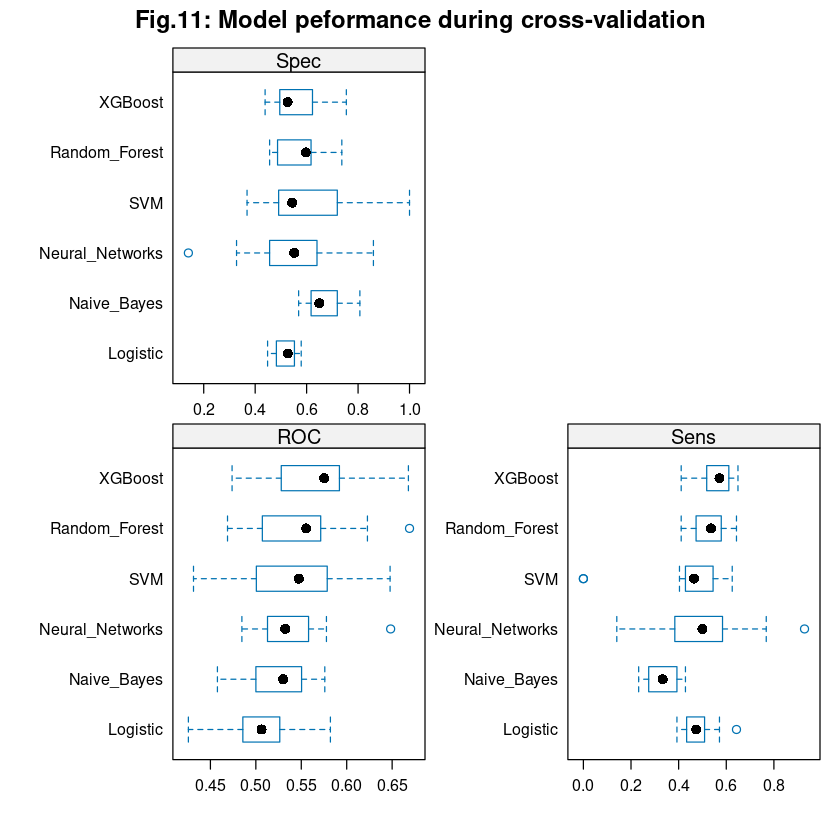

In [73]:
# Compare model performances using resample()
models_compare <- resamples(list(Naive_Bayes = nb_model,
								 Logistic = logit_model,
								 SVM = svm_model,
								 Random_Forest = rf_model,
								 XGBoost = xgb_model,
								 Neural_Networks = nn_model))

# Summary of the models performances
# summary(models_compare)

scales <- list(x=list(relation="free"), y=list(relation="free"))
bwplot(models_compare, scales = scales,
	   main = "Fig.11: Model peformance during cross-validation",
	   plot.order = c(1, 2, 3))

In Figure 11, one can conclude that **XGBoost is the top-performing model**, excelling in all key metrics, making it the best choice for this problem. SVM and Random Forest also perform well and can serve as strong alternatives. Neural Networks show moderate performance, while Naive Bayes and Logistic Regression are less effective in this particular setup.

Similarly, it is plotted the ROC with all the models in Figure 12:

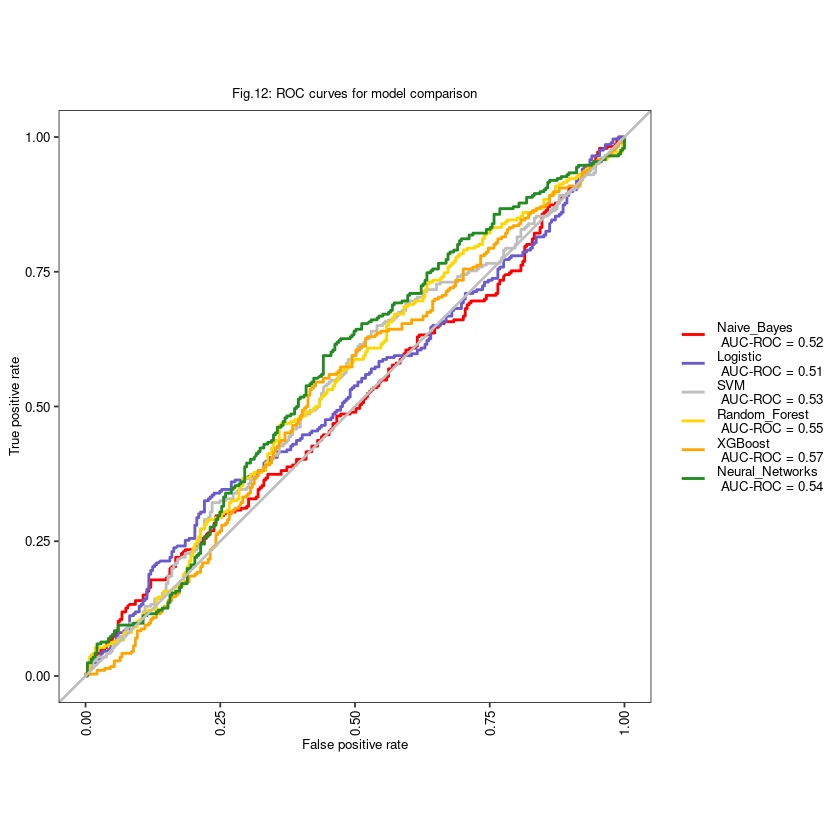

In [74]:
# Compute ROC curves for each model
eval_mdl <- evalm(list(nb_model, logit_model, svm_model, rf_model, xgb_model, nn_model),
				  gnames = c("Naive_Bayes", "Logistic", "SVM", "Random_Forest", "XGBoost", "Neural_Networks"),
				  silent = TRUE,
				  rlinethick = 0.8,
				  fsize = 8,
				  plots = c())

# Extract the ROC plot
roc_plot <- eval_mdl$roc

# Add a title to the ROC plot
roc_plot + ggtitle("Fig.12: ROC curves for model comparison")

Several other metrics can be calculated from the different models, as one can see in the table below:

In [75]:
# Metrics table
df_eval <- tibble(metric_eval = rownames(eval_mdl$optres$Naive_Bayes),
				  nb_eval = eval_mdl$optres$Naive_Bayes$Score,
				  logit_eval = eval_mdl$optres$Logistic$Score,
				  svm_eval = eval_mdl$optres$SVM$Score,
				  rf_eval = eval_mdl$optres$Random_Forest$Score,
				  xgb_eval = eval_mdl$optres$XGBoost$Score,
				  nn_eval = eval_mdl$optres$Neural_Networks$Score
				 )

df_eval

metric_eval,nb_eval,logit_eval,svm_eval,rf_eval,xgb_eval,nn_eval
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SENS,0.325,0.178,0.545,0.465,0.594,0.640
SPEC,0.779,0.879,0.573,0.641,0.559,0.470
MCC,0.117,0.080,0.118,0.107,0.153,0.111
Informedness,0.105,0.057,0.118,0.106,0.153,0.110
PREC,0.600,0.600,0.565,0.568,0.578,0.551
NPV,0.532,0.512,0.553,0.541,0.575,0.562
FPR,0.221,0.121,0.427,0.359,0.441,0.530
F1,0.422,0.275,0.555,0.512,0.586,0.592
TP,93.000,51.000,156.000,133.000,170.000,183.000


From the metrics above, it can be summarized the following:

- **Sensitivity (SENS):**
Neural Networks (0.64) and XGBoost (0.594) have the highest sensitivity, meaning they are better at correctly identifying positive cases. While, Logistic Regression has the lowest sensitivity (0.178), indicating poor performance at detecting positives.

- **Specificity (SPEC):**
Logistic Regression (0.879) and Naive Bayes (0.779) have the highest specificity, meaning they are better at correctly identifying negative cases. While, Neural Networks (0.47) and XGBoost (0.559) have lower specificity.

- **F1 Score (F1):**
XGBoost (0.586) and Neural Networks (0.592) achieve the highest F1 scores, balancing precision and recall effectively. While, Logistic Regression has the lowest F1 score (0.275), which aligns with its low sensitivity.

- **AUC-ROC and AUC-PR:**
XGBoost consistently outperforms others with the highest AUC-ROC (0.57) and AUC-PR (0.55), showing a better overall discrimination ability. Naive Bayes and Logistic Regression have the weakest AUC-ROC and AUC-PR, both hovering around 0.51–0.54, barely above random performance.

- **MCC and Informedness:**
XGBoost has the highest Matthews Correlation Coefficient (MCC) and Informedness (both 0.153), suggesting it strikes the best balance between true positives, true negatives, false positives, and false negatives.


All in all, **XGBoost** emerges as the most balanced and effective model, with strong performance across sensitivity, F1 score, AUC-ROC, and MCC. While, Neural Networks, SVM and Random Forest offer a bit lower performance, balancing sensitivity and specificity but trailing XGBoost. Naive Bayes and Logistic Regression were the most underperforming models.

### Final modelling

From all the trained and tested models, it is observed that the more robust model throughout the cross-validation is the **XGBoost**. Even though, this model is one of the most time consuming to train, **it is decided to use XGBoost as the final model.**

And its optimal hyperparameters are the following:
 - nrounds = 150
 - max_depth = 9
 - eta = 0.1
 - gamma = 1
 - colsample_bytree = 0.5
 - min_child_weight = 5
 - subsample = 1

Using the values, the final model is trained with the full dataset using the predictors (genetics, smoking, poor hair care habits, weight loss, environmental factors, hormonal changes, stress, and age group).

In [76]:
# Optimal hyperparameters
best_params <- xgb_model$bestTune

fitControl <- trainControl(method = "none", classProbs = TRUE)

set.seed(314)
final_model <- caret::train(hair_loss ~ .,
				 data = df_mdl_filter, 
                 method = "xgbTree", 
                 trControl = fitControl, 
                 verbose = FALSE, 
                 ## Only a single model can be passed to the
                 ## function when no resampling is used:
                 tuneGrid = best_params,
                 metric = "ROC")

### Testing the best model on myself

In this last stage of this work, I applied the model on myself.

My characteristics are:
 - **Genetics:** No bald condition in my family (Value = 0)
 - **Smoking:** I do not smoke (Value = 0)
 - **Poor hair care habits:** I could be more careful regarding my hair care habits, so I will say they are poor (Value = 1)
 - **Weight loss:** I did not have weight loss in the near past (Value = 0)
 - **Environmental factors:** I'm not involved within environmental factors that may contribute to hair loss (Value = 0)
 - **Hormonal changes:** I did not have hormonal changes in the near past (Value = 0)
 - **Stress:** Moderate levels of stress (Value = 1)
 - **Age group:** Below 28 years old (Value = 0)

In [77]:
my_characteristics <- data.frame(
	genetics = 0,
	smoking = 0,
	poor_hair_care_habits = 1,
    weight_loss = 0,
	environmental_factors = 0,
    hormonal_changes = 0,
    stress = 1,
    age_group = 0) # Below than 28 years old (group 0)

my_prediction_xgb <- predict(final_model, newdata = my_characteristics, type = "prob")
my_prediction_xgb

print(paste("Based on my characteristics, the model predicts as:", predict(final_model, newdata = my_characteristics), "hair loss condition"))

print("The reality regarding my hair loss condition is NO - as I do not have signs of hair loss")

No,Yes
<dbl>,<dbl>
0.82061,0.17939


[1] "Based on my characteristics, the model predicts as: No hair loss condition"
[1] "The reality regarding my hair loss condition is NO - as I do not have signs of hair loss"


## 🪮 Recommendations:

In this study, it was analyzed 999 individuals regarding their hair loss condition by working with data provided from surveys. The information of each survey was condensed in the following variables: 

- **Genetics** - Whether the person has a family history of baldness (Yes/No).
- **Hormonal Changes** - Indicates whether the individual has experienced hormonal changes (Yes/No).
- **Medical Conditions** - Medical history that may lead to baldness; alopecia areata, thyroid problems, scalp infections, psoriasis, dermatitis, etc.
- **Medications & Treatments** - History of medications that may cause hair loss; chemotherapy, heart medications, antidepressants, steroids, etc.
- **Nutritional Deficiencies** - Lists nutritional deficiencies that may contribute to hair loss, such as iron deficiency, vitamin D deficiency, biotin deficiency, omega-3 fatty acid deficiency, etc.
- **Stress** - Indicates the stress level of the individual (Low/Moderate/High).
- **Age** - Represents the age of the individual.
- **Poor Hair Care Habits** - Indicates whether the individual practices poor hair care habits (Yes/No).
- **Environmental Factors** - Indicates whether the individual is exposed to environmental factors that may contribute to hair loss (Yes/No).
- **Smoking** - Indicates whether the individual smokes (Yes/No).
- **Weight Loss** - Indicates whether the individual has experienced significant weight loss (Yes/No).
- **Hair Loss** - Binary variable indicating the presence (1) or absence (0) of baldness in the individual **(Target)**.

This work was divided into 3 levels: Descriptive statistics, Visualization, and Machine Learning. These levels can be summarized as follows:

**Level 1: Descriptive Statistics**

At the start of the analysis, the dataset seemed fairly balanced in terms of age groups and the proportion of people experiencing hair loss. The survey itself provided detailed information about the participants' health and medical history, which made it clear that there was more to uncover in the data. This led to a deeper investigation in **Level 2**.

**Level 2: Visualization**

In this stage, I decided to categorize the numeric variable "age" into groups with similar characteristics. To do this, I analyzed how well age could predict hair loss. From this, I divided the variable into two groups: "Below 28 years old" and "28 years old or higher."

I also examined how the predictors in the dataset were related to each other, looking for strong correlations. It turned out most predictors showed weak or no associations with one another, except for some notable cases: age groups were linked to nutritional deficiencies, and stress levels were tied to certain medical conditions. I also explored whether stress was significantly associated with hair loss, and it seemed there was a connection.

However, the overall analysis revealed that **no single predictor was strong enough on its own to estimate hair loss accurately**. It became clear that multiple factors would need to be combined for better predictions.

**Level 3: Machine Learning**

To tackle the challenge of using multiple predictors for hair loss estimation, I applied PCA (Principal Component Analysis) and a Random Forest analysis of variable importance. **PCA showed that the dataset had many overlapping features and that hair loss characteristics were similar across different groups, which could make classification difficult.**

The Random Forest analysis highlighted the most important predictors: **lifestyle factors like smoking and hair care habits, along with genetics and age.** Interestingly, medical history, medications, and nutritional information didn’t hold much predictive value for the models.

Then I trained and tested several machine learning methods to classify hair loss. Among them, XGBoost performed the best, though it came with the downside of being time-consuming to train and validate. For fun, I tested the final model using my own data - and it correctly predicted that I’m not experiencing hair loss!

**Main Takeaways**

This work highlights that while progress has been made, there’s still more to learn about analyzing and predicting hair loss. Future surveys could benefit from including more detailed information, and the models can certainly be refined.

From this study, **the main takeaway is that hair loss is heavily influenced by both physiological factors (like age, hormonal changes, and genetics) and lifestyle choices (such as stress, environmental factors, and hair care habits).** While we can’t control our genetics, this research suggests that improving lifestyle habits and hair care routines can **significantly** reduce the risk of hair loss.

## 🚀 Suggestions for further work

The findings highlight that no model currently achieves a high degree of accuracy in classifying hair loss conditions. To address this challenge, several ideas for improvement can be explored.

One promising approach involves testing more complex models to capture nuances that simpler models might overlook. Introducing additional complexity, however, should be balanced with strategies to avoid overfitting. **An alternative method for optimization is applying Bayesian hyperparameter optimization, which can provide a more efficient and potentially superior model tuning process compared to traditional grid search techniques.**

**Moreover, adopting nested cross-validation instead of repeated cross-validation could enhance both model performance and the reliability of its assessment.** Nested cross-validation ensures a more robust evaluation of a model's ability to generalize by addressing issues such as data leakage during hyperparameter tuning.

**The dataset itself is a significant factor limiting model performance.** The analysis revealed substantial overlap among predictors across different target classes, resulting in classification accuracies ranging from 45% to 65%. To improve this, the dataset should be expanded to include a more balanced representation of age groups. **Specifically, increasing the sample size for individuals younger than 30 and older than 49 years is crucial, as these groups were underrepresented compared to the 30–49 age range. Furthermore, incorporating gender as a feature could offer valuable insights, as hair loss prevalence often differs between males and females, aligning with widely recognized patterns.**

These enhancements, addressing both model selection and dataset quality, offer a clear path for improving classification accuracy and deepening our understanding of the factors influencing hair loss conditions.